In [11]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [12]:
np.random.seed(52)

In [13]:
data = stats.multivariate_normal(np.zeros((50, ))).rvs(10000)
data = (data + 100 * np.random.normal(size=(10000,1)) + np.random.normal(size=(10000,1)) * np.arange(25, 75)
        + np.random.normal(scale=10, size=(10000,1)) * np.sin(np.pi/50*np.arange(0, 50)))

In [14]:
from PIL import Image
from glob import glob

images = [Image.open(file).convert(mode='L') for file in sorted(glob('emoji/*.png'))]
print('image count:', len(images))
shape = images[0].size
data = np.vstack([np.array(image, dtype=float).reshape(-1) for image in images])
mean = data.mean(axis=0).reshape(1, -1)
data -= mean

image count: 90


In [15]:
mean = np.mean(data, axis=0)
data = data - mean

In [16]:
u, s, v = np.linalg.svd(data)

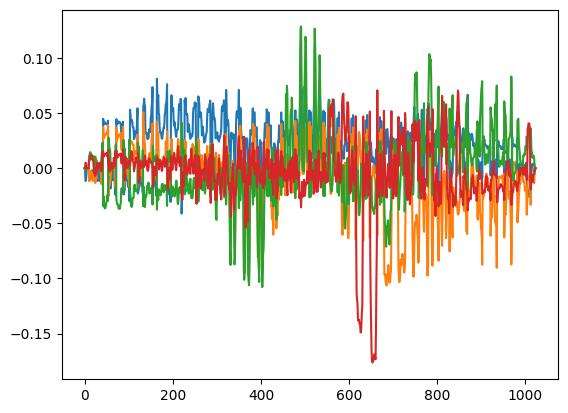

In [17]:
for i in range(4):
    plt.plot(v[i])

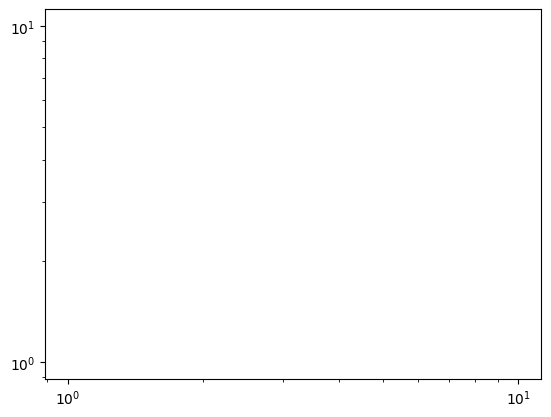

In [18]:
plt.yscale("log")
plt.xscale("log")


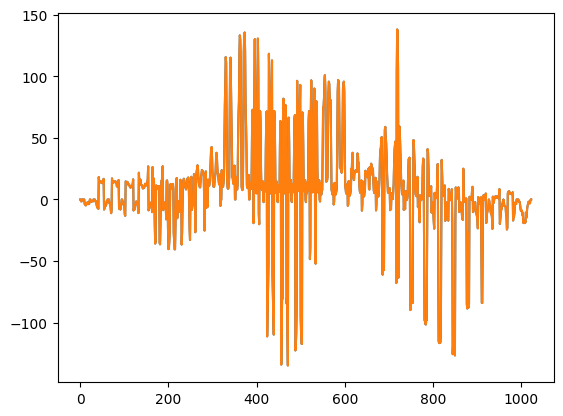

In [37]:
x = data[4, :]
decoder = v[0:100, :]
x_hat = np.dot(decoder.T, np.dot(decoder, x + mean)) - mean
plt.plot(x, label = "origion")
plt.plot(x_hat, label = "origion")

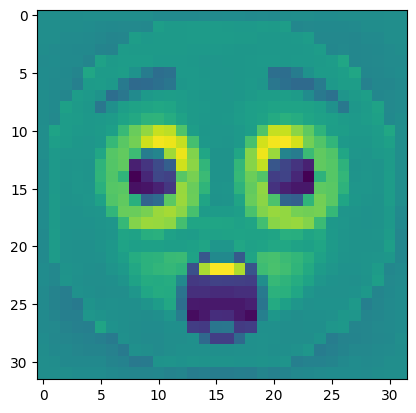

In [38]:
plt.imshow((x_hat).reshape(shape))

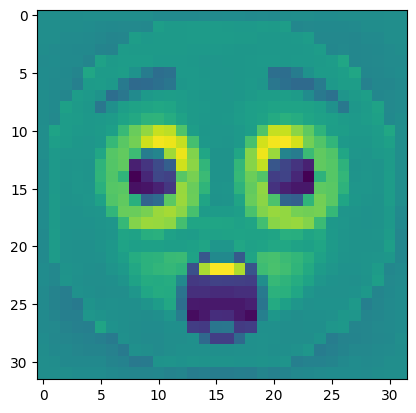

In [23]:
plt.imshow((data[4,:]+mean).reshape(shape))